# Assignment 2

## Part 1

#### 1. A data warehouse for a music streaming company consists of the dimensions song, user, time (time and date of when the user listened to a song), and the two measures count (how many times a user listened to the song) and fee (fee paid by the streaming company to the artist every time a user listens to that song). 


##### A. Draw a schema diagram for the above data warehouse using either a star, snowflake, or fact constellation schema.

![Schema](Schema.PNG)

##### B. Starting with the base cuboid [time, user, song], what specific OLAP operations should be performed in order to list the total fee collected for a given song for a given month of a given year (e.g. October 2020)?



First, I would use the dice operation to select the date (October 2020) and the song category, then i would drilldown to the song name and aggregate by feeAmount.

##### C. Assume that the time dimension has 5 levels (e.g. day, day of week, month, quarter, year); and that the song and user dimensions both have 1 level (not including the virtual level 'all'). How many cuboids will this cube contain (including the base and apex cuboids)? 

We have 3 dimensions

time has 5 levels

user has 1 level

song has 1 level

according to the equation in the lecture slide

24 = (5+1)*(1+1)*(1+1)


#### 2. Suppose we have access to a data cube that contains information on rainfall for specific regions; the data cube has dimensions region, precipitation, and time.
  

##### 2.1 Assuming that we would like to compute the total amount of rainfall for a given region and month, which *data cube measure* would we use? To which category of data cube measures does this particular measure fall into? 
 

I would use the sum() function. 

It falls under th Distributive category 

##### 2.2 Assuming that we would like to compute the average rainfall for a given region and month, which *data cube measure* would we use? To which category of data cube measures does this particular measure fall into? 

I would use the avg() function. 

It falls under th Algebric category 

#### 3. Suppose that a car rental company has a data warehouse that holds record ID lists of vehicles in terms of brands (Audi, Ford, Mini) and store branches (Tower Hamlets, Newham, Hackney). Each record consists of a combination of vehicle brand and branch. We would like to index the OLAP data using bitmap indices. Produce the *base table* for record IDs, and the corresponding *bitmap index tables* for vehicle brand and store branch.

![Bitmap Index](BitmapIndex.png)

#### 4. Using the same CSV file and data cube in the above lab tutorial, modify the "tutorial_model.json" file to include aggregate measures for the minimum and maximum amount in the data cube. Using these implemented aggregate measures, produce the values for the minimum and maximum amount in the data per year. Make sure to show your workings in the PDF report.

In [1]:
from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv
from cubes import Workspace


engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "IBRD_Balance_Sheet__FY2010.csv",
                      table_name="ibrd_balance",
                      fields=[
                          ("category", "string"),
                          ("category_label", "string"),
                          ("subcategory", "string"),
                          ("subcategory_label", "string"),
                          ("line_item", "string"),
                          ("year", "integer"),
                          ("amount", "integer")],
                      create_id=True
                     )


workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")


workspace.import_model("tutorial_model.json")
cube = workspace.cube("ibrd_balance")

browser = workspace.browser(cube)







In [9]:
import cubes as cubes

cuts = [cubes.PointCut("year", ["2009"])]
cell = cubes.Cell(cube, cuts)

result = browser.aggregate(cell, drilldown=["item:line_item"])

result.summary

#for record in result:
#    print(record) 

{'amount_sum': 550840,
 'amount_min': -1683,
 'amount_max': 110040,
 'record_count': 31}

In [7]:
result = browser.aggregate(drilldown=["year"] , aggregates=['amount_max','amount_min'])

for record in result:
    print(record)

{'year': 2009, 'amount_max': 110040, 'amount_min': -1683}
{'year': 2010, 'amount_max': 128577, 'amount_min': -3043}


 the change to the "tutorial_model.json" file:  
      
      
      "dimensions": ["item", "year"],
        "measures": [{"name":"amount", "label":"Amount"}],
        "aggregates": [
                    {	
                        "name": "amount_sum",
                        "measure": "amount",
                        "function": "sum"
                    },
                    {
                        "name": "amount_min",
                        "measure": "amount",
                        "function": "min"
                    },
                    {
                        "name": "amount_max",
                        "measure": "amount",
                        "function": "max"
                    },
                    {
                        "name": "record_count",
                        "function": "count"
                    }
        ]

#### 5. Using the CSV file "country-income.csv" (found in the supplementary lab documents), perform the following:


##### 5.1 Load the CSV file using Cubes, create a JSON file for the data cube model, and create a data cube for the data. Use as dimensions the region, age, and online shopper fields. Use as measure the income. Define aggregate functions in the data cube model for the total, average, minimum, and maximum income. In your PDF report, show the relevant scripts and files created. 

In [3]:
from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv
from cubes import Workspace


engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "country-income.csv",
                      table_name="country_income",
                      fields=[
                          ("Region", "string"),
                          ("Age", "integer"),
                          ("Income", "integer"),
                          ("Online_Shopper", "string")],
                      create_id=True
                     )


workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")


workspace.import_model("tutorial_model2.json")
cube = workspace.cube("country_income")

browser = workspace.browser(cube)


In [4]:
result = browser.aggregate(drilldown=["Region"])

for record in result:
    print(record)

{'Region': 'Brazil', 'amount_sum': 193200, 'amount_min': 57600, 'amount_max': 73200, 'amount_avg': 64400.0, 'record_count': 3}
{'Region': 'India', 'amount_sum': 331200, 'amount_min': 69600, 'amount_max': 94800, 'amount_avg': 82800.0, 'record_count': 4}
{'Region': 'USA', 'amount_sum': 243800, 'amount_min': 64800, 'amount_max': 99600, 'amount_avg': 81266.66666666667, 'record_count': 3}


In [6]:
result = browser.aggregate(drilldown=["Region"], aggregates=['amount_sum','amount_max','amount_min','amount_avg'])

for record in result:
    print(record)

{'Region': 'Brazil', 'amount_max': 73200, 'amount_min': 57600, 'amount_avg': 64400.0}
{'Region': 'India', 'amount_max': 94800, 'amount_min': 69600, 'amount_avg': 82800.0}
{'Region': 'USA', 'amount_max': 99600, 'amount_min': 64800, 'amount_avg': 81266.66666666667}


The content of "tutorial_model2.json" file:

    {
        "dimensions": [

            {"name":"Region"},
            {"name":"Age"},
            {"name":"Online_Shopper"}

        ],
        "cubes": [
            {
                "name": "country_income",
                "dimensions": ["Region", "Age","Online_Shopper"],
                "measures": [{"name":"Income", "label":"Income"}],
                "aggregates": [
                            {	
                                "name": "amount_sum",
                                "measure": "Income",
                                "function": "sum"
                            },
                            {
                                "name": "amount_min",
                                "measure": "Income",
                                "function": "min"
                            },
                            {
                                "name": "amount_max",
                                "measure": "Income",
                                "function": "max"
                            },
                            {
                                "name": "amount_avg",
                                "measure": "Income",
                                "function": "avg"
                            },
                            {
                                "name": "record_count",
                                "function": "count"
                            }
                ],
                "mappings": {

                             },
                "info": {

                }
            }
        ]
    }


#####  5.2 Using the created data cube and data cube model, produce aggregate results for: the whole data cube; results per region; results per online shopping activity; and results for all people aged between 40 and 50.

In [7]:
result = browser.aggregate(drilldown=["Region"], aggregates=['amount_sum','amount_max','amount_min','amount_avg'])

for record in result:
    print(record)

{'Region': 'Brazil', 'amount_sum': 193200, 'amount_max': 73200, 'amount_min': 57600, 'amount_avg': 64400.0}
{'Region': 'India', 'amount_sum': 331200, 'amount_max': 94800, 'amount_min': 69600, 'amount_avg': 82800.0}
{'Region': 'USA', 'amount_sum': 243800, 'amount_max': 99600, 'amount_min': 64800, 'amount_avg': 81266.66666666667}


In [8]:
result = browser.aggregate(drilldown=["Age"], aggregates=['amount_sum','amount_max','amount_min','amount_avg'])

for record in result:
    print(record)

{'Age': 32, 'amount_sum': 57600, 'amount_max': 57600, 'amount_min': 57600, 'amount_avg': 57600.0}
{'Age': 35, 'amount_sum': 64800, 'amount_max': 64800, 'amount_min': 64800, 'amount_avg': 64800.0}
{'Age': 40, 'amount_sum': 69600, 'amount_max': 69600, 'amount_min': 69600, 'amount_avg': 69600.0}
{'Age': 42, 'amount_sum': 80400, 'amount_max': 80400, 'amount_min': 80400, 'amount_avg': 80400.0}
{'Age': 43, 'amount_sum': 73200, 'amount_max': 73200, 'amount_min': 73200, 'amount_avg': 73200.0}
{'Age': 45, 'amount_sum': 79400, 'amount_max': 79400, 'amount_min': 79400, 'amount_avg': 79400.0}
{'Age': 46, 'amount_sum': 62400, 'amount_max': 62400, 'amount_min': 62400, 'amount_avg': 62400.0}
{'Age': 49, 'amount_sum': 86400, 'amount_max': 86400, 'amount_min': 86400, 'amount_avg': 86400.0}
{'Age': 53, 'amount_sum': 94800, 'amount_max': 94800, 'amount_min': 94800, 'amount_avg': 94800.0}
{'Age': 55, 'amount_sum': 99600, 'amount_max': 99600, 'amount_min': 99600, 'amount_avg': 99600.0}


In [9]:
result = browser.aggregate(drilldown=["Online_Shopper"], aggregates=['amount_sum','amount_max','amount_min','amount_avg'])

for record in result:
    print(record)

{'Online_Shopper': 'No', 'amount_sum': 386400, 'amount_max': 99600, 'amount_min': 62400, 'amount_avg': 77280.0}
{'Online_Shopper': 'Yes', 'amount_sum': 381800, 'amount_max': 94800, 'amount_min': 57600, 'amount_avg': 76360.0}


In [15]:
result = browser.aggregate()
print('Total Sum:' ,result.summary['amount_sum'])
print('Max:' ,result.summary['amount_max'])
print('Min:' ,result.summary['amount_min'])
print('Average:' ,result.summary['amount_avg'])

Total Sum: 768200
Max: 99600
Min: 57600
Average: 76820.0


In [22]:

cuts = [ cubes.RangeCut("Age", [40], [50] ) ]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell,drilldown=["Age"], aggregates=['amount_sum','amount_max','amount_min','amount_avg'])

for record in result:
    print(record)




{'Age': 40, 'amount_sum': 69600, 'amount_max': 69600, 'amount_min': 69600, 'amount_avg': 69600.0}
{'Age': 42, 'amount_sum': 80400, 'amount_max': 80400, 'amount_min': 80400, 'amount_avg': 80400.0}
{'Age': 43, 'amount_sum': 73200, 'amount_max': 73200, 'amount_min': 73200, 'amount_avg': 73200.0}
{'Age': 45, 'amount_sum': 79400, 'amount_max': 79400, 'amount_min': 79400, 'amount_avg': 79400.0}
{'Age': 46, 'amount_sum': 62400, 'amount_max': 62400, 'amount_min': 62400, 'amount_avg': 62400.0}
{'Age': 49, 'amount_sum': 86400, 'amount_max': 86400, 'amount_min': 86400, 'amount_avg': 86400.0}


## Part 2

#### 1. Consider a dataset $\mathcal{D}$ that contains only two observations $\mathbf{x}_{1} = (1, 1)$ and $\mathbf{x}_2 = (-1, -1)$. Suppose that the class of the first observation is $y_1 = 0$ and that the class of the second observation is $y_2 = 1$. How would a 1-nearest neighbour classifier based on the Euclidean distance classify the observation $\mathbf{x} = (2, 3)$? What are the distances between this new observation and each observation in the dataset?

In [20]:
import numpy as np

a = (1,1) 
b = (-1,-1)



y = (0,1)

label = y

In [29]:
features = [a,b]


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
features

[[1, 1], [-1, -1]]

In [33]:
knn.fit(features,label)


KNeighborsClassifier(n_neighbors=1)

In [34]:
predicted= knn.predict([[2,3]]) # 0:Overcast, 2:Mild
print(predicted)

[0]


In [35]:
from math import sqrt


In [36]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [38]:
new = (2,3)
for row in features:
    distance = euclidean_distance(new, row)
    print(distance)

2.23606797749979
5.0


#### 2. Consider a dataset $\mathcal{D}$ that only contains observations of two different classes. Explain why a $k$-nearest neighbour classifier does not need a tie-breaking policy when $k$ is odd.

The k, in the KNN algorithm, represent the number of closest neighbors that you are comparing, no matter if you have 2 or n classes, if you choose an even k, there is a risk of a tie in the decision of which class you should set a new instance. This is why the k is usually odd - no ties.

For example

In KNN, K is the number of nearest neighbors. The number of neighbors is the main deciding factor thats why K is generally an odd number. We suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction.


#### 3. Explain why a classifier that obtains an accuracy of $99.9\%$ can be terrible for some datasets.

Classification Accuracy


"Classification accuracy is our starting point. It is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage".


for example in the breast cancer dataset a model is that only predicts no recurrence of breast cancer would achieve an accuracy of (2001/286)x100 or 70.28%. this accuracy is high but the model is terrible because it will incorrectly inform doctors that 85 women who have cancer dont have it resulting in a case of high negatives. 



#### 4. Consider a classifier tasked with predicting whether an observation belongs to class $y$ (positive class). Suppose that this classifier has precision $1.0$ and recall $0.1$ on a test dataset. If this classifier predicts that an observation does not belong to class $y$, should it be trusted? Should it be trusted if it predicts that the observation belongs to class $y$?

In [ ]:
precision = 1.0 # high precision = perfect precision

recall = 0.1 # low recall 

"Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned".


Precision can be thought of as a measure of a classifiers exactness. A low precision can also indicate a large number of False Positives, where high precision indicates a low False positive rate


Recall can be thought of as a measure of a classifiers completeness. A low recall indicates many False Negatives, and high recall relates to a low false negative rate.


A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. 

A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. 


In this question there is a high precision but low recall, which make the classifier alot picky in predicting the positive class which results in a high false negatives meaning that it misses a high number of actual positive class. As a result it cannot be trusted with predicting whether an observation belongs to class  𝑦 or not.







#### 5. What is the pair of classes that is most confusing for the $1$-nearest neighbour classifier trained in the previous sections?

In [40]:
# Configuring the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Selecting the training data from the original dataset
f = gzip.open('data/mnist.pkl.gz', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]

#i = 1520 #change i to any number to see the chnages
#plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
#plt.show()
#print('Observation index: {0}. Class: {1}.'.format(i, y[i]))

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [1, 3, 5, 7, 9, 10]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_test, y_test)))

Best hyperparameter setting: KNeighborsClassifier(n_neighbors=1).
Average accuracy across folds of best hyperparameter setting: 0.899375.
Test dataset accuracy of best hyperparameter setting: 0.8925.


In [50]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

y_pred = knn_cv.predict(X_test)

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred)
print('Precision for each class:\n {0}.'.format(precision))
print('Recall for each class: \n{0}.\n'.format(recall))

df = pd.DataFrame.from_records(confusion_matrix(y_test, y_pred))
print('Confusion matrix:')
display(df)

Precision for each class:
 [1.         0.8        0.975      0.975      0.85106383 0.82051282
 0.95121951 0.89473684 0.87096774 0.80555556].
Recall for each class: 
[0.97435897 1.         0.84782609 0.88636364 0.85106383 0.88888889
 0.92857143 0.87179487 0.84375    0.82857143].

Confusion matrix:


,0,1,2,3,4,5,6,7,8,9
0,38,0,0,0,0,0,1,0,0,0
1,0,40,0,0,0,0,0,0,0,0
2,0,3,39,0,0,2,0,1,1,0
3,0,1,1,39,0,1,0,1,0,1
4,0,3,0,0,40,0,0,1,0,3
5,0,0,0,1,0,32,1,0,2,0
6,0,1,0,0,1,1,39,0,0,0
7,0,0,0,0,2,1,0,34,0,2
8,0,2,0,0,0,2,0,0,27,1
9,0,0,0,0,4,0,0,1,1,29


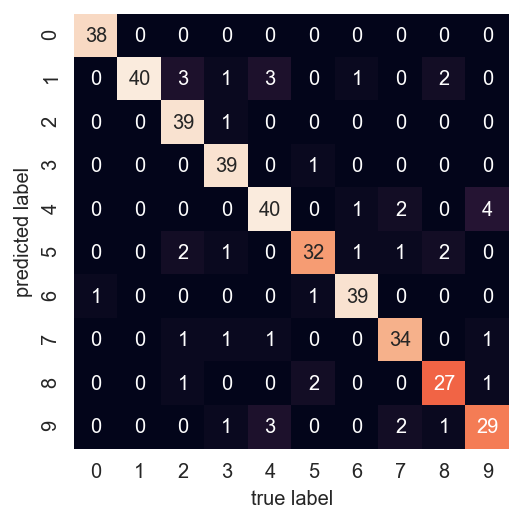

In [49]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

I used a heatmap on the confusion matrix to make more sense outof it and we can see the classifier is confused between the digit 9 and 4

#### 6. Train a support vector machine classifier using the same training dataset used in the previous sections and compute its accuracy on the corresponding test dataset. You can use the default hyperparameters for the class ``SVC`` from ``sklearn.svm``. Show the code in the report.

In [61]:
from sklearn import svm


f = gzip.open('data/mnist.pkl.gz', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]



#####
#X = [[0, 0], [1, 1]]
#y = [0, 1]
#clf = svm.SVC()
#clf.fit(X, y)
#SVC()


#clf.predict([[2., 2.]])
#array([1])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
from sklearn import metrics


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9275


In [73]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

Precision: 0.9307657388657347


In [74]:

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

Recall: 0.9264008135712576


#### 7. Using the same training dataset used in the previous sections, employ ``GridSearchCV`` to find the best hyperparameter settings based on 5-fold cross-validation for a ``RandomForestClassifier``. Consider ``n_estimators`` $ \in \{ 50, 100, 200\}$ and ``max_features`` $ \in \{0.1, 0.25\}$. Use the default values for the remaining hyperparameters. Compute the accuracy of the best model on the corresponding test dataset. Show the code in the report.

In [85]:
from sklearn.ensemble import RandomForestClassifier

f = gzip.open('data/mnist.pkl.gz', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [87]:
param_grid = {
    'max_features': [0.1, 0.25],
    'n_estimators': [50, 100, 200]
}


rfc = RandomForestClassifier()

rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
#rfc_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)

rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [0.1, 0.25],
                         'n_estimators': [50, 100, 200]})

In [90]:
print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(rfc_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(rfc_cv.score(X_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(max_features=0.1, n_estimators=200).
Average accuracy across folds of best hyperparameter setting: 0.9137500000000001.
Test dataset accuracy of best hyperparameter setting: 0.915.


#### 8. The function ``kmeans_update`` presented below is part of an implementation of the k-means clustering algorithm. The variable ``X`` is a matrix (numpy array) where each row corresponds to an observation. Explain in detail each line of this function. You can refer to each (non-empty) line by a number between 1 and 6. 

```python
def kmeans_update(X, cluster_centers): # we pass the variable X to the function which contains matrix of the observations and we pass the variable cluster_centers which contains a list of randomly chosen cluster centers. 
    
    y_pred = np.argmin(cdist(X, cluster_centers), axis=1) #y_pred is an array that contains all the indices of the distances between observations and thier nearest cluster centre
        
    next_cluster_centers = np.zeros(cluster_centers.shape) # initializing next_cluster_centers variable with a matrix of zeros
    
    for i in range(len(next_cluster_centers)): # loop through every new cluster
        next_cluster_centers[i] = X[y_pred == i].mean(axis=0) # computes the new centroid mean for each cluster, these new cluster centres will be used again if the centroids havn't converged   
        
    return y_pred, next_cluster_centers # returns the new cluster centre and an array of indices that point to the distance of an observation and its nearest cluster 
```